# Innomatics Research Labs | Advanced GenAI Internship |

In [1]:
import pandas as pd
import sqlite3

In [6]:
# -------------------------
# Step 1: Load CSV (orders)
# -------------------------
orders = pd.read_csv(r"C:\Users\Shree\OneDrive\Desktop\Inno intership\gen ai ent exam/orders.csv")
print("Orders shape:", orders.shape)
print(orders.head())


Orders shape: (10000, 6)
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  
0               New Foods Chinese  
1  Ruchi Curry House Multicuisine  
2           Spice Kitchen Punjabi  
3          Darbar Kitchen Non-Veg  
4       Royal Eatery South Indian  


In [7]:
# -------------------------
# Step 2: Load JSON (users)
# -------------------------
users = pd.read_json(r"C:\Users\Shree\OneDrive\Desktop\Inno intership\gen ai ent exam/users.json")
print("Users shape:", users.shape)
print(users.head())


Users shape: (3000, 4)
   user_id    name       city membership
0        1  User_1    Chennai    Regular
1        2  User_2       Pune       Gold
2        3  User_3  Bangalore       Gold
3        4  User_4  Bangalore    Regular
4        5  User_5       Pune       Gold


In [8]:
# -------------------------
# Step 3: Load SQL (restaurants)
# -------------------------
sql_path = r"C:\Users\Shree\OneDrive\Desktop\Inno intership\gen ai ent exam/restaurants.sql"

with open(sql_path, "r", encoding="utf-8") as f:
    sql_script = f.read()

# Load into SQLite in-memory DB
conn = sqlite3.connect(":memory:")
conn.executescript(sql_script)

restaurants = pd.read_sql_query("SELECT * FROM restaurants", conn)
print("Restaurants shape:", restaurants.shape)
print(restaurants.head())

Restaurants shape: (500, 4)
   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8


In [9]:
# -------------------------
# Step 4: Merge datasets
# Left Join (retain all orders)
# -------------------------
final = orders.merge(users, on="user_id", how="left")
final = final.merge(restaurants, on="restaurant_id", how="left", suffixes=("", "_rest"))

print("Final Dataset shape:", final.shape)
print(final.head())


Final Dataset shape: (10000, 12)
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_rest  cuisine  rating  
0       Restaurant_450  Mexican     3.2  
1       Restaurant_309   Indian     4.5  
2       Restaurant_107  Mexic

In [11]:
# Step 5: Save final output
# -------------------------
final.to_csv("final_food_delivery_dataset.csv", index=False)
print("✅ Saved file: final_food_delivery_dataset.csv")

✅ Saved file: final_food_delivery_dataset.csv


# analyze the final merge data set

In [16]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Shree\OneDrive\Desktop\Inno intership\final_food_delivery_dataset.csv")
print(df.shape)
print(df.head())



(10000, 12)
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_rest  cuisine  rating  
0       Restaurant_450  Mexican     3.2  
1       Restaurant_309   Indian     4.5  
2       Restaurant_107  Mexican     4.0  
3       

# 1) ✅ Order trends over time

## A) Orders per day/month

C:\Users\Shree\AppData\Local\Temp\ipykernel_18536\2338538611.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


order_date
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
dtype: int64


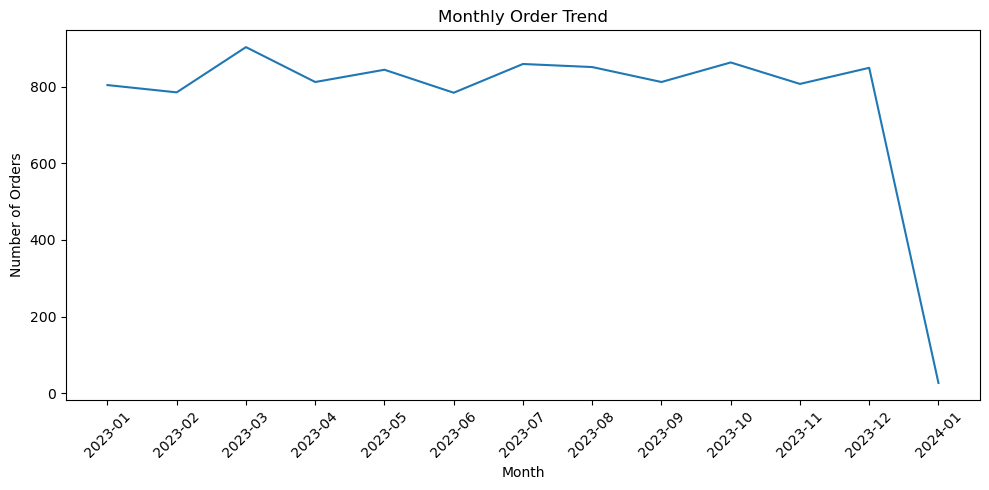

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Monthly orders trend
monthly_orders = df.groupby(df['order_date'].dt.to_period('M')).size()
monthly_orders.index = monthly_orders.index.astype(str)

print(monthly_orders.head())

plt.figure(figsize=(10,5))
plt.plot(monthly_orders.index, monthly_orders.values)
plt.xticks(rotation=45)
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


## B) Monthly Revenue trend

order_date
2023-01    645818.76
2023-02    630867.40
2023-03    716738.98
2023-04    666097.18
2023-05    668428.61
Name: total_amount, dtype: float64


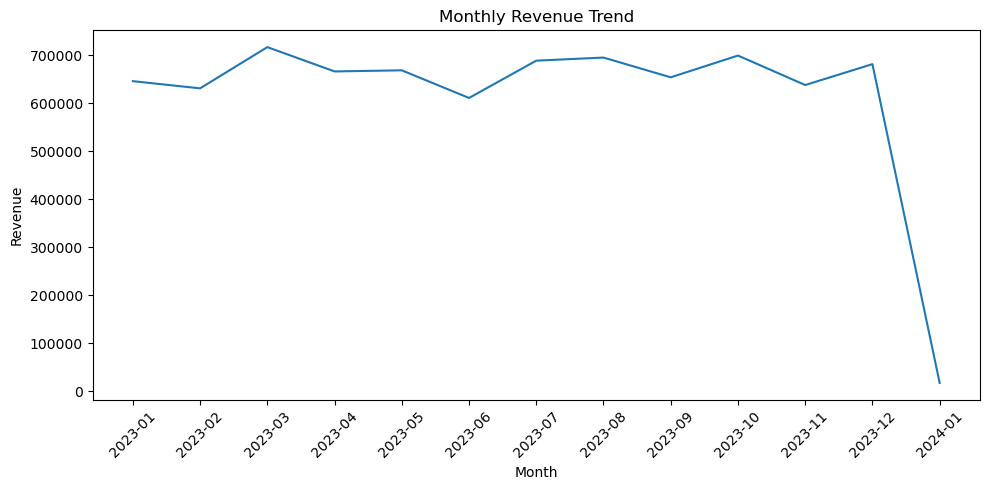

In [18]:
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum()
monthly_revenue.index = monthly_revenue.index.astype(str)

print(monthly_revenue.head())

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


# 2) ✅ User behavior patterns

## A) Top active users

In [19]:
top_users = df.groupby('user_id').size().sort_values(ascending=False).head(10)
print("Top 10 Active Users:\n", top_users)


Top 10 Active Users:
 user_id
2973    13
1515    12
496     11
874     11
1337    11
1201    10
789     10
2640    10
1841    10
650     10
dtype: int64


## B) Average Order Value per user

In [20]:
user_aov = df.groupby('user_id')['total_amount'].mean().sort_values(ascending=False).head(10)
print("Top 10 Users by Avg Order Value:\n", user_aov)


Top 10 Users by Avg Order Value:
 user_id
2429    1497.42
889     1492.63
1843    1484.24
1882    1481.84
925     1476.18
2904    1475.39
506     1471.19
1472    1462.79
1536    1461.84
1013    1461.61
Name: total_amount, dtype: float64


# 3) ✅ City-wise and cuisine-wise performance

## A) City-wise Orders + Revenue

In [21]:
city_perf = df.groupby('city').agg(
    total_orders=('order_id','count'),
    total_revenue=('total_amount','sum'),
    avg_order_value=('total_amount','mean')
).sort_values(by='total_revenue', ascending=False)

print(city_perf.head(10))


           total_orders  total_revenue  avg_order_value
city                                                   
Bangalore          2751     2206946.58       802.234308
Chennai            2469     1990513.03       806.202118
Pune               2430     1924797.93       792.097914
Hyderabad          2350     1889366.58       803.985779


## B) Cuisine-wise performance

In [22]:
cuisine_perf = df.groupby('cuisine').agg(
    total_orders=('order_id','count'),
    total_revenue=('total_amount','sum'),
    avg_order_value=('total_amount','mean')
).sort_values(by='total_revenue', ascending=False)

print(cuisine_perf.head(10))


         total_orders  total_revenue  avg_order_value
cuisine                                              
Mexican          2581     2085503.09       808.021344
Italian          2532     2024203.80       799.448578
Indian           2469     1971412.58       798.466011
Chinese          2418     1930504.65       798.389020


## C) Bar plot (Top 10 cuisines by revenue)

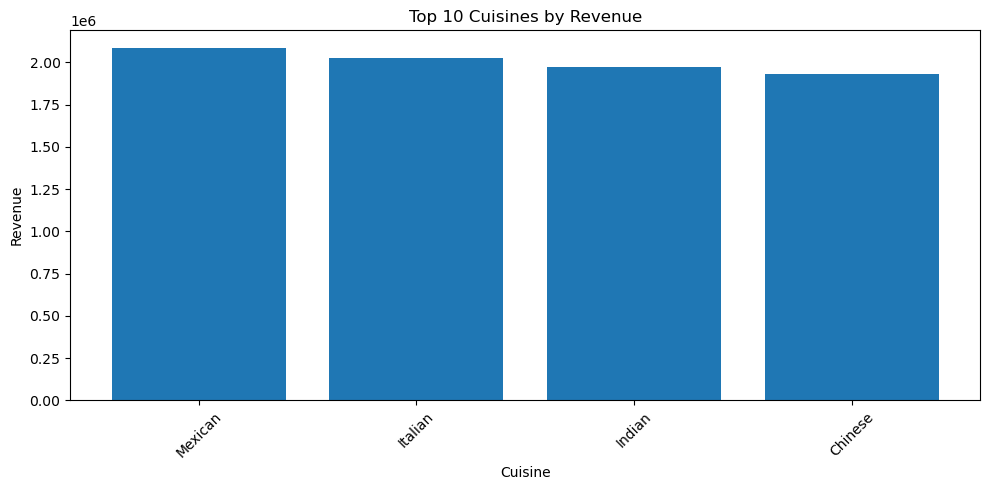

In [23]:
top10_cuisine = cuisine_perf.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10_cuisine.index.astype(str), top10_cuisine['total_revenue'].values)
plt.xticks(rotation=45)
plt.title("Top 10 Cuisines by Revenue")
plt.xlabel("Cuisine")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


# 4) ✅ Membership Impact (Gold vs Regular)

## A) Compare orders & revenue

In [24]:
membership_perf = df.groupby('membership').agg(
    total_orders=('order_id','count'),
    total_revenue=('total_amount','sum'),
    avg_order_value=('total_amount','mean')
)

print(membership_perf)


            total_orders  total_revenue  avg_order_value
membership                                              
Gold                4987     3975364.89       797.145556
Regular             5013     4036259.23       805.158434


## B) Gold vs Regular spending distribution

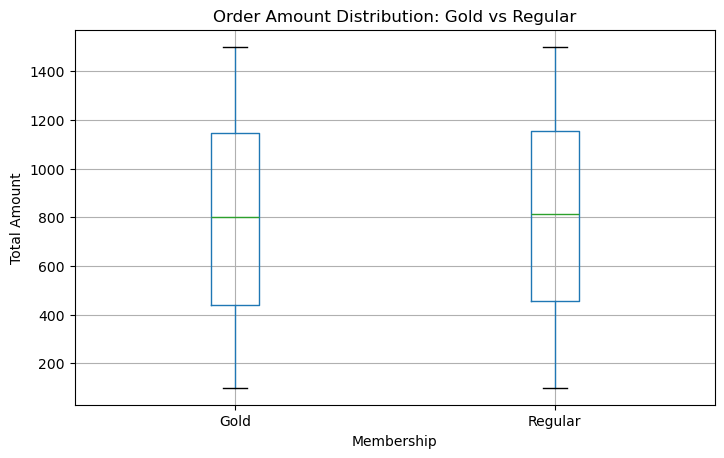

In [25]:
df.boxplot(column='total_amount', by='membership', figsize=(8,5))
plt.title("Order Amount Distribution: Gold vs Regular")
plt.suptitle("")
plt.xlabel("Membership")
plt.ylabel("Total Amount")
plt.show()


# 5) ✅ Revenue Distribution and Seasonality

## A) Revenue histogram

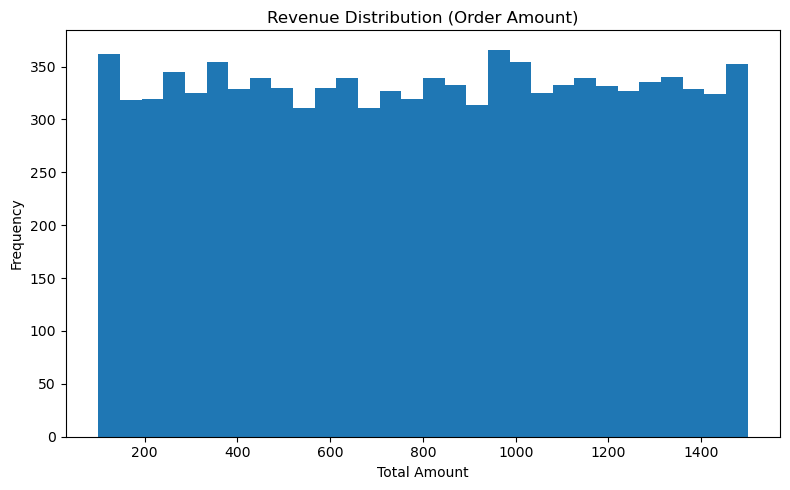

In [26]:
plt.figure(figsize=(8,5))
plt.hist(df['total_amount'], bins=30)
plt.title("Revenue Distribution (Order Amount)")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## B) Seasonality by Month

month
January      663020.26
February     630867.40
March        716738.98
April        666097.18
May          668428.61
June         610822.93
July         688559.45
August       694987.58
September    653838.07
October      699187.73
November     637772.43
December     681303.50
Name: total_amount, dtype: float64


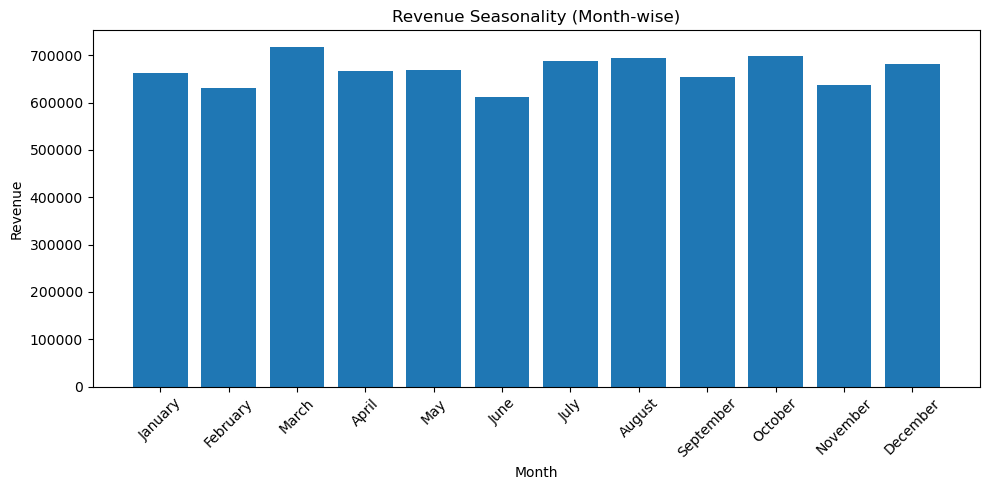

In [27]:
df['month'] = df['order_date'].dt.month_name()

month_revenue = df.groupby('month')['total_amount'].sum()

# sort month order properly
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_revenue = month_revenue.reindex(month_order)

print(month_revenue)

plt.figure(figsize=(10,5))
plt.bar(month_revenue.index, month_revenue.values)
plt.xticks(rotation=45)
plt.title("Revenue Seasonality (Month-wise)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


# Question to solve 

## Which city has the highest total revenue (total_amount) from Gold members?  


In [28]:

df = pd.read_csv(r"C:\Users\Shree\OneDrive\Desktop\Inno intership\final_food_delivery_dataset.csv")

# Filter Gold members
gold_df = df[df["membership"] == "Gold"]

# City-wise revenue from Gold
gold_city_revenue = gold_df.groupby("city")["total_amount"].sum().sort_values(ascending=False)

print(gold_city_revenue)
print("\n✅ Highest revenue city from Gold members:", gold_city_revenue.index[0])


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

✅ Highest revenue city from Gold members: Chennai


## Which cuisine has the highest average order value across all orders?


In [29]:
df = pd.read_csv(r"C:\Users\Shree\OneDrive\Desktop\Inno intership\final_food_delivery_dataset.csv")

cuisine_aov = df.groupby("cuisine")["total_amount"].mean().sort_values(ascending=False)

print(cuisine_aov)
print("\n✅ Highest AOV cuisine:", cuisine_aov.index[0])

cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

✅ Highest AOV cuisine: Mexican


## How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?


In [30]:

# total spend per user
user_total = df.groupby("user_id")["total_amount"].sum()

# users with total spend > 1000
count_users = (user_total > 1000).sum()

print("Distinct users with total spend > 1000:", count_users)

Distinct users with total spend > 1000: 2544


## Which restaurant rating range generated the highest total revenue?


In [31]:
# Make sure rating is numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Create rating bins
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0 – 3.5", "3.6 – 4.0", "4.1 – 4.5", "4.6 – 5.0"]

# Cut ratings into ranges
df["rating_range"] = pd.cut(df["rating"], bins=bins, labels=labels, include_lowest=True)

# Revenue by rating range
rating_revenue = df.groupby("rating_range")["total_amount"].sum().sort_values(ascending=False)

print(rating_revenue)
print("\n✅ Highest revenue rating range:", rating_revenue.index[0])

rating_range
4.6 – 5.0    2197030.75
3.0 – 3.5    2136772.70
4.1 – 4.5    1960326.26
3.6 – 4.0    1717494.41
Name: total_amount, dtype: float64

✅ Highest revenue rating range: 4.6 – 5.0


C:\Users\Shree\AppData\Local\Temp\ipykernel_18536\3747387266.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = df.groupby("rating_range")["total_amount"].sum().sort_values(ascending=False)


## Among Gold members, which city has the highest average order value?


In [32]:
# Filter only Gold members
gold = df[df["membership"] == "Gold"]

# City-wise average order value for Gold users
gold_city_aov = gold.groupby("city")["total_amount"].mean().sort_values(ascending=False)

print(gold_city_aov)
print("\n✅ Highest AOV city among Gold members:", gold_city_aov.index[0])

city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

✅ Highest AOV city among Gold members: Chennai


## Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?


In [34]:
cuisine_summary = df.groupby("cuisine").agg(
    distinct_restaurants=("restaurant_id", "nunique"),
    total_revenue=("total_amount", "sum"),
    total_orders=("order_id", "count")
).sort_values(["distinct_restaurants", "total_revenue"], ascending=[True, False])

print(cuisine_summary)
print("\n✅ Best match (lowest restaurants + good revenue):")


         distinct_restaurants  total_revenue  total_orders
cuisine                                                   
Chinese                   120     1930504.65          2418
Italian                   126     2024203.80          2532
Indian                    126     1971412.58          2469
Mexican                   128     2085503.09          2581

✅ Best match (lowest restaurants + good revenue):


## What percentage of total orders were placed by Gold members? (Rounded to nearest integer)


In [35]:
total_orders = len(df)
gold_orders = (df["membership"] == "Gold").sum()

percentage = round((gold_orders / total_orders) * 100)

print("Total orders:", total_orders)
print("Gold orders:", gold_orders)
print("✅ Percentage of orders by Gold members:", percentage, "%")

Total orders: 10000
Gold orders: 4987
✅ Percentage of orders by Gold members: 50 %


## Which restaurant has the highest average order value but less than 20 total orders?


In [36]:
# Find restaurant stats
rest_stats = df.groupby("restaurant_name").agg(
    total_orders=("order_id", "count"),
    avg_order_value=("total_amount", "mean")
)

# Filter restaurants with < 20 orders
filtered = rest_stats[rest_stats["total_orders"] < 20].sort_values("avg_order_value", ascending=False)

print(filtered.head(20))
print("\n✅ Restaurant with highest AOV (<20 orders):", filtered.index[0])


                                       total_orders  avg_order_value
restaurant_name                                                     
Hotel Dhaba Multicuisine                         13      1040.222308
Sri Mess Punjabi                                 12      1029.180833
Ruchi Biryani Punjabi                            16      1002.140625
Sri Delights Pure Veg                            18       989.467222
Classic Kitchen Family Restaurant                19       973.167895
Hotel Dhaba Chinese                              18       973.125556
Amma Mess Pure Veg                               18       965.299444
Hotel Biryani Pure Veg                           13       964.577692
Annapurna Curry House Multicuisine               17       954.512353
Taste of Restaurant Family Restaurant            10       948.220000
Taste of Mess Chinese                            18       942.272778
Sri Kitchen Punjabi                              16       941.330625
Ruchi Dhaba Non-Veg               

## Which combination contributes the highest revenue?


In [37]:
# total revenue by membership + cuisine
combo_rev = df.groupby(["membership", "cuisine"])["total_amount"].sum().sort_values(ascending=False)

print(combo_rev)

# check only the 4 options
options = [
    ("Gold", "Indian"),
    ("Gold", "Italian"),
    ("Regular", "Indian"),
    ("Regular", "Chinese")
]

print("\n--- Revenue for MCQ options ---")
for m, c in options:
    val = combo_rev.get((m, c), 0)
    print(f"{m} + {c}: {val}")

best = max(options, key=lambda x: combo_rev.get(x, 0))
print("\n✅ Highest revenue combination:", best[0], "+", best[1])

membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

--- Revenue for MCQ options ---
Gold + Indian: 979312.31
Gold + Italian: 1005779.05
Regular + Indian: 992100.27
Regular + Chinese: 952790.91

✅ Highest revenue combination: Gold + Italian


## During which quarter of the year is the total revenue highest?


In [38]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["quarter"] = df["order_date"].dt.quarter

quarter_revenue = df.groupby("quarter")["total_amount"].sum().sort_values(ascending=False)

print(quarter_revenue)

top_q = quarter_revenue.index[0]
print("\n✅ Highest revenue quarter:", top_q)

quarter
3    2037385.10
4    2018263.66
1    2010626.64
2    1945348.72
Name: total_amount, dtype: float64

✅ Highest revenue quarter: 3


C:\Users\Shree\AppData\Local\Temp\ipykernel_18536\1915091536.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])


# Question set B
- 1.How many total orders were placed by users with Gold membership?
- 2.What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
- 3.How many distinct users placed at least one order?
- 4.What is the average order value (rounded to 2 decimals) for Gold members?
  

In [40]:
# 1) Total orders placed by Gold members
gold_orders = (df["membership"] == "Gold").sum()

# 2) Total revenue from Hyderabad (rounded)
hyd_revenue = round(df[df["city"] == "Hyderabad"]["total_amount"].sum())

# 3) Distinct users placed at least one order
distinct_users = df["user_id"].nunique()

# 4) Average order value for Gold members (rounded to 2 decimals)
gold_aov = round(df[df["membership"] == "Gold"]["total_amount"].mean(), 2)

print("1) Total orders by Gold members:", gold_orders)
print("2) Total revenue from Hyderabad:", hyd_revenue)
print("3) Distinct users who placed >=1 order:", distinct_users)
print("4) Avg order value for Gold members:", gold_aov)

1) Total orders by Gold members: 4987
2) Total revenue from Hyderabad: 1889367
3) Distinct users who placed >=1 order: 2883
4) Avg order value for Gold members: 797.15


# - 5.How many orders were placed for restaurants with rating ≥ 4.5?
- 6.How many orders were placed in the top revenue city among Gold members only?

In [41]:
# Ensure rating is numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# 1) Orders for restaurants with rating >= 4.5
orders_rating_45 = df[df["rating"] >= 4.5].shape[0]

# 2) Orders in top revenue city among Gold members only
gold_df = df[df["membership"] == "Gold"]

# Find top revenue city for Gold members
top_city = gold_df.groupby("city")["total_amount"].sum().idxmax()

# Count number of orders in that top city (Gold members only)
orders_top_city_gold = gold_df[gold_df["city"] == top_city].shape[0]

print("1) Orders for restaurants with rating >= 4.5:", orders_rating_45)
print("Top revenue city among Gold members:", top_city)
print("2) Orders in that top revenue city (Gold only):", orders_top_city_gold)

1) Orders for restaurants with rating >= 4.5: 3374
Top revenue city among Gold members: Chennai
2) Orders in that top revenue city (Gold only): 1337


# Question set c

# fill-in-the-blanks:

- The column used to join orders.csv and users.json is __________.
  ✅ user_id

- The dataset containing cuisine and rating information is stored in __________ format.
✅ SQL format (i.e., restaurants.sql)

- The total number of rows in the final merged dataset is __________.
✅ Same as orders.csv number of rows (because we used left join on orders)
➡️ i.e., total orders count

- If a user has no matching record in users.json, the merged values will be __________.
✅ NaN / null (missing values)

- The Pandas function used to combine datasets based on a key is __________.
✅ merge() (i.e., df.merge())

- The column membership in the final dataset originates from the __________ file.
✅ users.json

- The join key used to combine orders data with restaurant details is __________.
✅ restaurant_id

- The column that helps identify the type of food served by a restaurant is __________.
✅ cuisine

- If a user places multiple orders, their personal details appear __________ times in the final merged dataset.
✅ multiple times (once per order)